# Notebook for INF588 - 2024

In [4]:
import warnings

In [5]:
%load_ext autoreload
%autoreload 2

## First class - Python warm up and the Vienna RNA package

In the class INF588, you are going to work on two different Bioinformatics projects:   
- Computing alignments of proteins using structural information  
- Predicting the structure of RNAs from an RNA alignment

Both projects require you to write Python code to implement the required algorithms and tools and then apply them to biological data.

Thus, before jumping into these projects it makes sense to

1. re-activate or strengthen your Python skills by solving some warm-up assignments, which mostly prepare code required in the projects;
1. learn about simple use of Biopython to read/write bio-data. *Note*: find details online on-the-go, e.g. when you want to read sequences from fasta format and alignments in clustal or stockholm format;
1. learn how to use the Vienna RNA package, which we need for the RNA-related project.



## About this document

This Jupyter notebook serves several purposes:

* It contains warm-up Python programming tasks for the first class.

* It introduces the Vienna RNA package for use in the RNA folding project.

* It shows how to install required software including Python, Biopython and the Vienna RNA package, locally or in Google Colab.

* It provides examples for the use of the Vienna package from Python - providing a mini-tutorial tailored to our needs.

* Finally, it provides a pointer to test data (and shows how to upload it on Colab, if you have to).

For today, it is possible to work in this notebook on Colab, i.e. write and run your code in the browser. You could continue using Colab for the rest of this class, but it is likely more convenient to continue without Colab after install Python and the required packages locally.


## Installation of Biopython and the Vienna RNA package

We install the special Python modules Biopython and the Vienna RNA package using pip. On Google Colab, this requires no further preparation, but the
installation has to be repeated once per session. If you work locally (as recommended), then the installation needs to be done only once. However, you need to install Python 3.x, pip, and VS Code or Jupyter(*) in advance. 

(*) We recommend VS Code to edit and run this Jupyter notebook (.ipynb file); or use Jupyter to do the same in your browser. 

Our two special Python modules can be installed by pip by running the next cell. In the same way, we can install additional packages as required, e.g. matplotlib and seaborn. Many standard packages are typically alread installed in Google Colab.

In [6]:
# !pip install viennarna biopython

## Python warm-up assignments



### Assignment 1: Sequence identity of an alignment

An RNA sequence is a string containing only the characters A, C, G, and U, which denote the four nucleotides Adenin, Cytosin, Guanin, and Uracil.

An alignment of two RNA sequences x and y is typically represented by a pair of alignment strings x' and y' that additionally contain gap symbols $-$.

The pair $x', y'$ represents an alignment of RNA sequences $x$ and $y$ iff
1. removing gap symbols in $x'$ [$y'$] yields the sequences $x$ [$y$], resp.
2. there is no $i$ such that $x_i=-$ and $y_i=-$.

For example,
```
x' = ACGU--CGACUAGC-
y' = -CGUCGU-ACUCGCG
```
represents an alignment of ```ACGUCGACUAGC``` and ```CGUCGUACUCGCG```.
A column $(x'_i,y'_i)$ is called a match if $x'_i=y'_i$.

1. Write a function that takes the two alignment strings and returns the percentage of match colunmns, i.e. the sequence identity of the alignment.

1. In publicly available RNA sequence data, one will often find small letter symbols and even T instead of U. Extend the function such that it can converts small letters to capital ones and T to U. Write another function to perform this transformation and make the transformation optional in the sequence identity function, e.g. by adding another argument with default ```True```.

1. Write a function that returns a list of the *edges* in an alignment. An edge is a pair of respective positions $i$ and $j$ in $x$ and $y$ that are in the same alignment column (regardless whether matched or mismatched). The alignment should be givn as a pair of alignment strings. Indexing sequence positions from 1 to the sequence length [*1-based indexing*], edges of our example alignment are (2,1), (3,2), (4,3), (5,6), ..., (12,12). For example, (5,6) is an *edge* of the alignment given by $x',y'$, because the `C` at position 5 of sequence $x$ is in the same column as the `G` at position 6 of $y$.

1. Add meaningful doc strings to your functions. Generally, one should get into the habit of writing at least a brief description for every function / method / class. It is good practice, to describe arguments and return value (see function sequence_identity below). Using type hints, as in sequence_identity (even sporadically), can be a good idea as well.

1. Write unit tests for your functions; design simple examples that include edge cases like gaps at the beginning and end of sequences, consecutive insertion and deletion, empty alignment, identical alignment strings, no identity...

In [7]:
def preprocess_rna_seq(seq: str) -> str:
    """
    Preprocess RNA sequence by uppercasing and converting T to U

    Args:
        seq: RNA sequence

    Returns:
        preprocessed RNA sequence    
    """
    return seq.upper().replace('T', 'U')

In [8]:
def test_preprocess_rna_seq():
    """
    Test function for preprocess_rna_seq

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert preprocess_rna_seq('ATGC') == 'AUGC', "Error in test case 1: T to U"
    assert preprocess_rna_seq('atgc') == 'AUGC', "Error in test case 2: lower case and T to U"
    assert preprocess_rna_seq('ATGCATGC') == 'AUGCAUGC', "Error in test case 3: T to U"
    assert preprocess_rna_seq('ATGCTTGC') == 'AUGCUUGC', "Error in test case 4: T to U"
    assert preprocess_rna_seq('ATGCTTGCATGC') == 'AUGCUUGCAUGC', "Error in test case 5: T to U"
    assert preprocess_rna_seq('ATGCTTGCatgc') == 'AUGCUUGCAUGC', "Error in test case 6: lower case and T to U"
    return "All tests passed"

test_preprocess_rna_seq()

'All tests passed'

In [9]:
def sequence_identity(xp:str, yp:str, need_preprocess = True) -> str:
    """
    Sequence identity of two aligned sequences

    Args:
      xp: alignment string of sequence x
      yp: alignment string of sequence y
      need_preprocess: whether to preprocess the sequences
    
    Returns:
      Percentage of identical alignment columns
    """
    assert len(xp) == len(yp), "Sequences must have the same length"
    if need_preprocess:
        xp = preprocess_rna_seq(xp)
        yp = preprocess_rna_seq(yp)

    xp_symbols = [x for x in xp]
    yp_symbols = [y for y in yp]
    return f"{sum([1 for x, y in zip(xp_symbols, yp_symbols) if x == y]) / len(xp) * 100:.2f}%"

In [10]:
def test_sequence_identity():
    """
    Test function for sequence_identity

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert sequence_identity("ACGT", "ACGT", False) == "100.00%", f"No preprocessing. Identical sequences test failed, percentage should be 100 and not {sequence_identity('ACGT', 'ACGT', False)}"
    assert sequence_identity("ACGT", "AC-A", False) == "50.00%", f"No preprocessing. Half identical sequences test failed, percentage should be 50 and not {sequence_identity('ACGT', 'ACGT', False)}"
    assert sequence_identity("ACGT", "----", False) == "0.00%", f"No preprocessing. No identical sequences test failed, percentage should be 0 and not {sequence_identity('ACGT', 'ACGT', False)}"
    assert sequence_identity("ACGT", "ACGU", True) == "100.00%", f"Preprocessing T to U. Identical sequences test failed, percentage should be 100 and not {sequence_identity('ACGT', 'ACGU', True)}"
    assert sequence_identity("ACGT", "AC-U", True) == "75.00%", f"Preprocessing T to U. 3/4 identical sequences test failed, percentage should be 75 and not {sequence_identity('ACGT', 'AC-U', True)}"
    assert sequence_identity("ACGT", "----", True) == "0.00%", f"Preprocessing T to U. No identical sequences test failed, percentage should be 0 and not {sequence_identity('ACGT', '----', True)}"
    assert sequence_identity("acgu", "ACGU", True) == "100.00%", f"Preprocessing lower case. Identical sequences test failed, percentage should be 100 and not {sequence_identity('acgu', 'ACGU', True)}"

    return "All tests passed"

test_sequence_identity()

'All tests passed'

In [11]:
def alignment_edges(xp, yp):
    """
        Extract edges from alignment strings.
        An edge is a pair of respective positions $i$ and $j$ in $x$ and $y$ that are in the same alignment column 
        (regardless whether matched or mismatched). The alignment should be givn as a pair of alignment strings. 
        Indexing sequence positions from 1 to the sequence length. 
        x' = ACGU--CGACUAGC-
        y' = -CGUCGU-ACUCGCG
        Edges of our example alignment are (2,1), (3,2), (4,3), (5,6), ..., (12,12). 

        Args:
            xp: alignment string of sequence x
            yp: alignment string of sequence y
        
        Returns:
            List of edges in the alignment graph

        Example:
            alignment_edges("ACGT", "AC-T") == [(1,1), (2, 2), (4, 3)]
    """
    assert len(xp) == len(yp), "Sequences must have the same length"
    edges = []
    i, j = 0, 0
    for k in range(len(xp)):
        if xp[k] != '-' and yp[k] != '-':
            i += 1
            j += 1
            edges.append((i, j))
        elif xp[k] == '-':
            j += 1
        else:
            i += 1
    return edges

In [12]:
def test_alignment_edges():
    """
    Test function for alignment_edges

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert alignment_edges("ACGT", "ACGT") == [(1,1), (2, 2), (3, 3), (4, 4)], f"Identical sequences test failed, edges should be [(1,1), (2, 2), (3, 3), (4, 4)] and not {alignment_edges('ACGT', 'ACGT')}"
    assert alignment_edges("ACGT", "AC-T") == [(1,1), (2, 2), (4, 3)], f"Half identical sequences test failed, edges should be [(1,1), (2, 2), (4, 3)] and not {alignment_edges('ACGT', 'AC-T')}"
    assert alignment_edges("ACGT", "----") == [], f"No identical sequences test failed, edges should be [] and not {alignment_edges('ACGT', '----')}"
    return "All tests passed"

test_alignment_edges()

'All tests passed'

### Assignment 2: RNA structure dot-bracket representation


An *RNA structure* for an RNA of sequence length $n$ is a set of *base pairs* $(i,j)$, $1 \leq i < j \leq n$. Typically, we restrict ourselves to structures that can be represented by *dot-bracket strings*. These strings contain only dots ```.``` and opening and closing brackets ```(``` and ```)```. They contain one symbol for each sequence position. The dot marks an unpaired position, while an opening bracket tells that the base is paired to the base of the corresponding closing bracket.

For example, let the sequence and structure of an RNA described by
```
sequence = "CGCUUAGCGAAUC"
dbstring = ".((...))(...)"
```
Then, the dot-bracket string ```dbstring``` describes the structure (aka the set of base pairs) ```{(2,8),(3,7),(9,13)}```.

A structure is *canonical* for a sequence $x$, if for all base pairs $(i,j)$ of the structure $(x_i,x_j)$ is one of the *canonical base pairs* (A,U),(C,G),(G,C),(G,U),(U,A), or (U,G).

1. Write a function that takes a sequence length and a set or list of base pairs and returns the corresponding dot-bracket string.

1. Write a function ```parse_RNA_structure``` that takes a dot-bracket string and returns the corresponding base pair set as a list. How should it handle invalid dot-bracket strings? Use exceptions (https://docs.python.org/3/tutorial/errors.html).

1. Write a function ```is_canonical``` that checks whether a structure, given as dot-bracket string, is canonical for a sequence. (Write helper functions like ```is_canonical_basepair(x,y)```, where reasonable.)

1. Based on your previous code, implement a Python class ```RnaMolecule``` that represents an RNA sequence and a corresponding structure. Objects of this class should be initialized with a sequence and optionally a structure, printing an object should show the sequence and dot bracket string, it should be possible to get the base pair list representation of an object... (https://docs.python.org/3/tutorial/classes.html)

**Note:** pay attention that we use one-based positions to describe the base pairs, while strings in Python use zero-based indices. One and zero-based indexing is a recurring issue when working with RNAs and specifically the Vienna RNA package. Beware since this is a potential source of errors.

In [13]:
def edges_to_dot_bracket(edges, seq_len):
    """
    Convert edges to dot bracket notation

    Args:
        edges: List of edges in the alignment graph
        seq_len: Length of the sequence
        
    Returns:
        Dot bracket notation of the alignment graph

    Example:
        edges_to_dot_bracket([(2, 8), (3, 7), (9, 13)], 13) -> '.((...))(...)'
    """
    dot_bracket = ['.'] * seq_len
    for i, j in edges:
        assert i!=j, f"Edges must be of the form (i, i) where i != j, i={i}, j={j}"
        assert i <= seq_len and j <= seq_len, f"Edges must be within the sequence length, i={i}, j={j}, seq_len={seq_len}"
        assert i < j, f"Edges must be of the form (i, j) where i < j, i={i}, j={j}"
        dot_bracket[i-1] = '('
        dot_bracket[j-1] = ')'
    return ''.join(dot_bracket)

In [14]:
def test_edges_to_dot_bracket():
    """
    Test function for edges_to_dot_bracket

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert edges_to_dot_bracket([(2, 8), (3, 7), (9, 13)], 13) == '.((...))(...)', f"Test case 1 failed, expected .((...))(...) but got {edges_to_dot_bracket([(2, 8), (3, 7), (9, 13)], 13)}"
    assert edges_to_dot_bracket([],6) == '......', f"Test case 2 failed, expected ...... but got {edges_to_dot_bracket([],6)}"
    assert edges_to_dot_bracket([(1, 6)],6) == '(....)', f"Test case 3 failed, expected (....) but got {edges_to_dot_bracket([(1, 6)],6)}"
    try:
        edges_to_dot_bracket([(1, 1)],1)
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 4 failed, expected an assertion error but got {edges_to_dot_bracket([(1, 1)],1)}")
    try:
        edges_to_dot_bracket([(1, 2)],1)
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 5 failed, expected an assertion error but got {edges_to_dot_bracket([(1, 2)],1)}")
    try:
        edges_to_dot_bracket([(2, 1)],2)
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 6 failed, expected an assertion error but got {edges_to_dot_bracket([(2, 1)],2)}")

    return "All tests passed"

test_edges_to_dot_bracket()

'All tests passed'

In [15]:
def parse_rna_structure(dot_bracket:str) -> list:
    """
    Parse RNA structure from dot bracket notation

    Args:
        dot_bracket: Dot bracket notation of the RNA structure
        
    Returns:
        List of base pairs

    Example:
        parse_rna_structure('.((...))(...)') -> [(2, 8), (3, 7), (9, 13)]
    """
    stack = []
    base_pairs = []
    for i, c in enumerate(dot_bracket):
        if c == '(':
            stack.append(i+1)
        elif c == ')':
            assert len(stack) > 0, "Unmatched brackets )"
            base_pairs.append((stack.pop(), i+1))
    base_pairs = sorted(base_pairs, key=lambda x: x[0])
    assert len(stack) == 0, "Unmatched brackets ("
    return base_pairs

In [16]:
def test_parse_rna_structure():
    """
    Test function for parse_rna_structure

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert parse_rna_structure('.((...))(...)') == [(2, 8), (3, 7), (9, 13)], f"Test case 1 failed, expected [(2, 8), (3, 7), (9, 13)] but got {parse_rna_structure('.((...))(...)')}"
    assert parse_rna_structure('......') == [], f"Test case 2 failed, expected [] but got {parse_rna_structure('......')}"
    assert parse_rna_structure('(....)') == [(1, 6)], f"Test case 3 failed, expected [(1, 6)] but got {parse_rna_structure('(....)')}"
    try:
        parse_rna_structure('..(..')
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 4 failed, expected an assertion error but got {parse_rna_structure('..(..')}")
    try:
        parse_rna_structure('..)..')
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 5 failed, expected an assertion error but got {parse_rna_structure('..)..')}")
    
    return "All tests passed"

test_preprocess_rna_seq()

'All tests passed'

In [17]:
def is_canonical_base_pair(x, y):
    """
    Check if two bases form a canonical base pair: (A,U),(C,G),(G,C),(G,U),(U,A), or (U,G)

    Args:
        x: base 1
        y: base 2
        
    Returns:
        True if x, y form a canonical base pair, False otherwise
    """
    assert x in ['A', 'C', 'G', 'U'], f"Invalid base {x}"
    assert y in ['A', 'C', 'G', 'U'], f"Invalid base {y}"
    return (x == 'A' and y == 'U') or (x == 'U' and y == 'A') or (x == 'G' and y == 'C') or (x == 'C' and y == 'G') or (x == 'G' and y == 'U') or (x == 'U' and y == 'G')

In [18]:
def test_is_canonical_base_pair():
    """
    Test function for is_canonical_base_pair

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert is_canonical_base_pair('A', 'U') == True, f"Test case 1 failed, expected True but got {is_canonical_base_pair('A', 'U')}"
    assert is_canonical_base_pair('U', 'A') == True, f"Test case 2 failed, expected True but got {is_canonical_base_pair('U', 'A')}"
    assert is_canonical_base_pair('G', 'C') == True, f"Test case 3 failed, expected True but got {is_canonical_base_pair('G', 'C')}"
    assert is_canonical_base_pair('C', 'G') == True, f"Test case 4 failed, expected True but got {is_canonical_base_pair('C', 'G')}"
    assert is_canonical_base_pair('G', 'U') == True, f"Test case 5 failed, expected True but got {is_canonical_base_pair('G', 'U')}"
    assert is_canonical_base_pair('U', 'G') == True, f"Test case 6 failed, expected True but got {is_canonical_base_pair('U', 'G')}"
    assert is_canonical_base_pair('A', 'C') == False, f"Test case 7 failed, expected False but got {is_canonical_base_pair('A', 'C')}"
    assert is_canonical_base_pair('C', 'A') == False, f"Test case 8 failed, expected False but got {is_canonical_base_pair('C', 'A')}"
    assert is_canonical_base_pair('G', 'A') == False, f"Test case 9 failed, expected False but got {is_canonical_base_pair('G', 'A')}"
    assert is_canonical_base_pair('A', 'G') == False, f"Test case 10 failed, expected False but got {is_canonical_base_pair('A', 'G')}"
    assert is_canonical_base_pair('U', 'C') == False, f"Test case 11 failed, expected False but got {is_canonical_base_pair('U', 'C')}"
    assert is_canonical_base_pair('C', 'U') == False, f"Test case 12 failed, expected False but got {is_canonical_base_pair('C', 'U')}"
    assert is_canonical_base_pair('A', 'A') == False, f"Test case 13 failed, expected False but got {is_canonical_base_pair('A', 'A')}"
    assert is_canonical_base_pair('C', 'C') == False, f"Test case 14 failed, expected False but got {is_canonical_base_pair('C', 'C')}"
    assert is_canonical_base_pair('G', 'G') == False, f"Test case 15 failed, expected False but got {is_canonical_base_pair('G', 'G')}"
    assert is_canonical_base_pair('U', 'U') == False, f"Test case 16 failed, expected False but got {is_canonical_base_pair('U', 'U')}"
    try:
        is_canonical_base_pair('P', 'T')
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 17 failed, expected an assertion error but got {is_canonical_base_pair('A', 'T')}")
    return "All tests passed"

test_is_canonical_base_pair()

'All tests passed'

In [19]:
def is_canonical(dot_bracket:str, seq:str) -> bool:
    """
    Check if the RNA structure is canonical

    Args:
        dot_bracket: Dot bracket notation of the RNA structure
        seq: RNA sequence
        
    Returns:
        True if the RNA structure is canonical, False otherwise
    """
    base_pairs = parse_rna_structure(dot_bracket)
    for i, j in base_pairs:
        assert i < j, f"Base pair ({i}, {j}) is invalid, i must be less than j"
        assert i > 0 and j > 0, f"Base pair ({i}, {j}) is invalid, positions must be positive"
        assert i <= len(seq) and j <= len(seq), f"Base pair ({i}, {j}) is invalid, sequence length is {len(seq)}"
        if not is_canonical_base_pair(seq[i-1], seq[j-1]):
            return False
                
    return True

In [20]:
def test_is_canonical():
    """
    Test function for is_canonical

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    assert is_canonical('......', 'ACGUAC') == True, f"Test case 1 failed, expected True but got {is_canonical('......', 'ACGUAC')}"
    assert is_canonical('(....)', 'ACGUAC') == False, f"Test case 2 failed, expected False but got {is_canonical('(....)', 'ACGUAC')}"
    assert is_canonical('(....)', 'ACGUAU') == True, f"Test case 3 failed, expected True but got {is_canonical('(....)', 'ACGUAC')}"
    assert is_canonical('((....))', 'ACGGGUAC') == False, f"Test case 4 failed, expected False but got {is_canonical('((....))', 'ACGGGUAC')}"
    assert is_canonical('((....))', 'ACGGGUGU') == True, f"Test case 5 failed, expected True but got {is_canonical('((....))', 'ACGGGUGU')}"
    assert is_canonical('.((...))(...)', 'ACGUACCGACGGU') == True, f"Test case 6 failed, expected True but got {is_canonical('.((...))(...)', 'ACGUACGGACGGU')}"
    assert is_canonical('.((...))(...)', 'ACGUACGUACGGC') == False, f"Test case 7 failed, expected False but got {is_canonical('.((...))(...)', 'ACGUACGUACGGC')}"
    try:
        is_canonical('.((...))(...)', 'ACGUACG')
    except AssertionError:
        pass
    else:
        raise AssertionError(f"Test case 8 failed, expected an assertion error but got {is_canonical('.((...))(...)', 'ACGUACGUACGGCU')}")
   
    return "All tests passed"

test_is_canonical()

'All tests passed'

In [21]:
class RNAMolecule:
    """
    Represents an RNA sequence and its corresponding structure.
    
    Attributes:
        seq (str): RNA sequence (e.g., "AUGC").
        structure (str, optional): RNA structure in dot-bracket notation (e.g., "..((..))..").
        
    Methods:
    """
    @staticmethod
    def preprocess_rna_seq(seq: str) -> str:
        """
        Preprocess RNA sequence by uppercasing and converting T to U

        Args:
            seq: RNA sequence

        Returns:
            preprocessed RNA sequence    
        """
        return seq.upper().replace('T', 'U')

    def __init__(self, seq, structure=None):
        """
        Initializes an RNAMolecule object.
        
        Args:
            seq (str): RNA sequence.
            structure (str, optional): RNA structure in dot-bracket notation. Defaults to None.
        """
        self.seq = self.preprocess_rna_seq(seq)
        if structure is not None:
            self.structure = structure
        else:
            self.structure = None

    def __str__(self):
        """
        Returns a string representation of the RNA molecule.
        
        Returns:
            str: Sequence and structure in the format "Sequence: <seq>, Structure: <structure>".
        """
        return f"Sequence: {self.seq}\nStructure: {self.structure or 'None'}"
    
    @staticmethod
    def edges_to_dot_bracket(edges, seq_len):
        """
        Convert edges to dot bracket notation

        Args:
            edges: List of edges in the alignment graph
            seq_len: Length of the sequence
            
        Returns:
            Dot bracket notation of the alignment graph

        Example:
            edges_to_dot_bracket([(2, 8), (3, 7), (9, 13)], 13) -> '.((...))(...)'
        """
        dot_bracket = ['.'] * seq_len
        for i, j in edges:
            assert i!=j, f"Edges must be of the form (i, i) where i != j, i={i}, j={j}"
            assert i <= seq_len and j <= seq_len, f"Edges must be within the sequence length, i={i}, j={j}, seq_len={seq_len}"
            assert i < j, f"Edges must be of the form (i, j) where i < j, i={i}, j={j}"
            dot_bracket[i-1] = '('
            dot_bracket[j-1] = ')'
        return ''.join(dot_bracket)

    def parse_rna_structure(self) -> list:
        """
        Parse RNA structure from dot bracket notation

        Args:
            dot_bracket: Dot bracket notation of the RNA structure
            
        Returns:
            List of base pairs

        Example:
            parse_rna_structure('.((...))(...)') -> [(2, 8), (3, 7), (9, 13)]
        """
        dot_bracket = self.structure
        stack = []
        base_pairs = []
        for i, c in enumerate(dot_bracket):
            if c == '(':
                stack.append(i+1)
            elif c == ')':
                assert len(stack) > 0, "Unmatched brackets )"
                base_pairs.append((stack.pop(), i+1))
        base_pairs = sorted(base_pairs, key=lambda x: x[0])
        assert len(stack) == 0, "Unmatched brackets ("
        return base_pairs
    
    @staticmethod
    def is_canonical_base_pair(x, y):
        """
        Check if two bases form a canonical base pair: (A,U),(C,G),(G,C),(G,U),(U,A), or (U,G)

        Args:
            x: base 1
            y: base 2
            
        Returns:
            True if x, y form a canonical base pair, False otherwise
        """
        assert x in ['A', 'C', 'G', 'U'], f"Invalid base {x}"
        assert y in ['A', 'C', 'G', 'U'], f"Invalid base {y}"
        return (x == 'A' and y == 'U') or (x == 'U' and y == 'A') or (x == 'G' and y == 'C') or (x == 'C' and y == 'G') or (x == 'G' and y == 'U') or (x == 'U' and y == 'G')
    
    def is_canonical(self) -> bool:
        """
        Check if the RNA structure is canonical

        Args:
            dot_bracket: Dot bracket notation of the RNA structure
            seq: RNA sequence
            
        Returns:
            True if the RNA structure is canonical, False otherwise
        """
        seq = self.seq
        dot_bracket = self.structure
        if dot_bracket is None:
            warnings.warn("Structure is not provided")
            return False
        base_pairs = self.parse_rna_structure()
        for i, j in base_pairs:
            assert i < j, f"Base pair ({i}, {j}) is invalid, i must be less than j"
            assert i > 0 and j > 0, f"Base pair ({i}, {j}) is invalid, positions must be positive"
            assert i <= len(seq) and j <= len(seq), f"Base pair ({i}, {j}) is invalid, sequence length is {len(seq)}"
            if not is_canonical_base_pair(seq[i-1], seq[j-1]):
                return False
                    
        return True

In [22]:
def test_class_rna():
    """
    Test function for RNAMolecule class

    Returns:
        String All tests passed if all tests are successful, otherwise raises an exception
    """
    rna_test = RNAMolecule("ACGUAC")
    assert rna_test.seq == "ACGUAC", f"Test case 1 failed, expected ACGUAC but got {rna_test.seq}"
    assert rna_test.structure == None, f"Test case 2 failed, expected None but got {rna_test.structure}"
    rna_test = RNAMolecule("ACGUAC", "......")
    assert rna_test.seq == "ACGUAC", f"Test case 3 failed, expected ACGUAC but got {rna_test.seq}"
    assert rna_test.structure == "......", f"Test case 4 failed, expected ...... but got {rna_test.structure}"
    rna_test = RNAMolecule("ACGUAC", "(....)")
    assert rna_test.seq == "ACGUAC", f"Test case 5 failed, expected ACGUAC but got {rna_test.seq}"
    assert rna_test.structure == "(....)", f"Test case 6 failed, expected (....) but got {rna_test.structure}"
    assert str(rna_test) == "Sequence: ACGUAC\nStructure: (....)", f"Test case 7 failed, expected Sequence: ACGUAC\nStructure: (....) but got {str(rna_test)}"
    print("Printing test:\n", rna_test, sep="")
    rna_test = RNAMolecule("acguac", "(....)")
    assert rna_test.seq == "ACGUAC", f"Test case 8 failed, expected ACGUAC but got {rna_test.seq}"
    assert rna_test.structure == "(....)", f"Test case 9 failed, expected (....) but got {rna_test.structure}"
    assert rna_test.is_canonical() == False, f"Test case 10 is canonical failed, expected False but got {rna_test.is_canonical()}"
    assert rna_test.parse_rna_structure() == [(1, 6)], f"Test case 11 failed, expected [(1, 6)] but got {rna_test.parse_rna_structure()}"
    return "All tests passed"


test_class_rna()

Printing test:
Sequence: ACGUAC
Structure: (....)


'All tests passed'

### Assignment 3: Map an RNA structure to a sequence based on an alignment string

Another sub-problem that you will likely encounter in the RNA-project is the following: given an alignment string $x'$ and a dot bracket string $y'$ of the length of the alignment, obtain $x$ and the corresponding dot-bracket string $y$ that describes the 'projected' structure for $x$.

This situation occurs when $y'$ describes a consensus structure of the sequences in an alignment. 

As an example, consider the following alignment
with a dot-bracket string that describes the consensus base pairs.

```
GCCGCUUA-CAGGAAUCCUGC
CGCGCUUAGCAGGAAUCCUCG
GCC-CUUAG-U-GAAUCCAGC
((.((...))(((...)))))
```

For the third alignment row and the dot bracket structure, we want to obtain the following sequence and projected structure
```
GCCCUUAGUGAAUCCAGC
((.(...)((...).)))
```
Compared to the consensus structure, the projected structure does not contain any base pair that involved gaps in the alignment string.

1. Write a function that performs the 'projection'. It should return the sequence and projected structure. Make use of previously implemented functions from the previous assignments, where appropriate.

1. Test [and document] your function.

1. Can you reasonably use [or even extend?] the class ```RnaMolecule``` from the previous assignment?

In [57]:
def rna_structure_projection(aligned_sequence, dot_bracket_structure):
    """ 
    Perform RNA structure projection. The projected structure does not contain any base pair that involved gaps in the alignment string.

    Args:
        aligned_sequence: RNA sequence
        dot_bracket_structure: RNA structure in dot-bracket notation
    
    Returns:
        (sequence, projected_structure): Tuple of RNA sequence and projected structure
    
    Example:
        rna_structure_projection('GCC-CUUAG-U-GAAUCCAGC', '((.((...))(((...)))))') == ('GCCCUUAGUGAAUCCAGC', '((.(...)((...).)))')
    """
    assert len(aligned_sequence) == len(dot_bracket_structure), "Sequences must have the same length"
    edges = parse_rna_structure(dot_bracket_structure)
    sequence = []
    projected_structure = []
    to_convert = [] # if first bracket is deleted, we need to delete the second bracket as well, so to convert second one in a dot
    for i, (s, b) in enumerate(zip(aligned_sequence, dot_bracket_structure)):
        if i in to_convert:
            if b == ')':
                b = '.'
            to_convert.remove(i)
        if s == '-':
            if b == '(':
                # we need to find in edges if there is a pair with i
                found = False
                for edge in edges:
                    if edge[0] == i+1:
                        found = True
                        break
                if found:
                    to_convert.append(edge[1]-1)
        else:
            sequence.append(s)
            projected_structure.append(b)
    return ''.join(sequence), ''.join(projected_structure)

In [59]:
def test_rna_structure_projection():
    assert rna_structure_projection('AC--G-T', "((..).)") == ('ACGT', '(())'), f"Expected ('ACGT', '(())') but got {rna_structure_projection('AC--G-T', '((..).)')}"
    assert rna_structure_projection('--CA---T', '(.)((.))') == ('CAT', '.()'), f"Expected ('CAT', '.()') but got {rna_structure_projection('--CA---T', '(.)((.))')}"
    assert rna_structure_projection('GCC-CUUAG-U-GAAUCCAGC', '((.((...))(((...)))))') == ('GCCCUUAGUGAAUCCAGC', '((.(...)((...).)))'), f"Expected ('GCCCUUAGUGAAUCCAGC', '((.(...)((...).)))') but got {rna_structure_projection('GCC-CUUAG-U-GAAUCCAGC', '((.((...))(((...)))))')}"
    return "RNA projection tests passed"

test_rna_structure_projection()


'RNA projection tests passed'

### Assignment 4: Count paths in an $n\times m$ grid

In both projects of the class, you will be asked to implement dynamic programming algorithms. As warm-up solve the following problem. An efficient solution uses dynamic programming.

Given is a $n \times m$ grid.

For example, here is a grid of $3 \times 4$ cells:
```
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
```
We want to count the number of paths from the upper-left to the lower-right cell, where paths can only move right or down in each step.
Here, is the example grid with one possible path:
```
.     + - + - + - + - +
.     | #---# |   |   |
.     + - + | + - + - +
.     |   | #---#---# |
.     + - + - + - + | +
.     |   |   |   | # |
.     + - + - + - + - +
```

1. Write a recursive function that counts paths for $n\times m$ based on the numbers of paths for $n-1\times m$ and $n\times m-1$. Test your function for some [small] instances. Why is this function inefficient?

1. Based on the recursive function, develop an efficient function that avoids redundant computation of sub-problems due to dynamic programming.

1. Consider the problem variant, where paths can as well move diagonally down-right. How is this problem related to a typical pairwise sequence alignment algorithm (like Needleman-Wunsch)?

In [67]:
def path_number(n, m):
    """
    Calculate the number of paths in an n x m grid from the top-left to the bottom-right

    Args:
        n: Number of rows
        m: Number of columns

    Returns:
        Number of paths
    """
    if n == 0 or m == 0:
        return 0
    if n == 1 or m == 1:
        return 1
    return path_number(n-1, m) + path_number(n, m-1)

In [71]:
path_number(3, 3)

6

## The Vienna RNA package

Before working on the RNA project, you should briefly familiarize yourself with the elementary functionality of the Vienna package. You will get example code that is almost ready to use. The most essential theory is/will be also presented in class and on lecture slides.

We use the Vienna RNA package in the RNA project (mainly) to predict Minimum Free Energy structures of RNAs as well as to predict base pair probabilities; moreover, to call RNAalifold for comparison and benchmarks. These uses will be demonstrated in this document.

The home of the Vienna package is

https://www.tbi.univie.ac.at/RNA/

Among other things, you will find **documentation of the Python API** (https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html).

Recall, that one can install the Vienna RNA package using pip: ```pip install viennarna```

## Usage of the Vienna RNA package in Python

One finds more details in the API documentation:

https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html

#### Predicting the Minimum free energy structure

In [74]:
import RNA
# The RNA sequence
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"

# create a new model details structure
md = RNA.md()
print(md)

# optionally one could change all kinds of parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default dangles=2 for compatibility with partition folding
print(md)

# create a fold compound
fc = RNA.fold_compound(sequence, md)

# predict Minmum Free Energy and corresponding secondary structure
(ss, mfe) = fc.mfe()

# print sequence, structure and MFE
print("%s\n%s [ %6.2f ]\n" % (sequence, ss, mfe))

{ temperature: 37, dangles: 2, betaScale: 1, pf_smooth: 1, special_hp: 1, noLP: 0, noGU: 0, noGUclosure: 0, logML: 0, circ: 0, circ_penalty: 1, gquad: 0, uniq_ML: 0, energy_set: 0, backtrack: 1, backtrack_type: F, compute_bpp: 1, max_bp_span: -1, min_loop_size: 3, window_size: -1, oldAliEn: 0, ribo: 0, cv_fact: 1, nc_fact: 1, sfact: 1.07, salt: 1.021, saltMLLower: 6, saltMLUpper: 24, saltDPXInit: 99999, saltDPXInitFact: -45.324, helical_rise: 2.8, backbone_length: 6 }
{ temperature: 37, dangles: 2, betaScale: 1, pf_smooth: 1, special_hp: 1, noLP: 0, noGU: 0, noGUclosure: 0, logML: 0, circ: 0, circ_penalty: 1, gquad: 0, uniq_ML: 0, energy_set: 0, backtrack: 1, backtrack_type: F, compute_bpp: 1, max_bp_span: -1, min_loop_size: 3, window_size: -1, oldAliEn: 0, ribo: 0, cv_fact: 1, nc_fact: 1, sfact: 1.07, salt: 1.021, saltMLLower: 6, saltMLUpper: 24, saltDPXInit: 99999, saltDPXInitFact: -45.324, helical_rise: 2.8, backbone_length: 6 }
GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA
..(((((....

For interpretation the dot bracket string in a program, the RNA lib supports conversion to a 'pair table'.
This can be used as alternative to a base pair list (as you were asked to produce before in parse_RNA_structure) or allows to more easily generate one.

In [75]:
# parse the dot-bracket structure:
# RNA.ptable returns a table, such that table[i]=j if (i.j) pair or 0 if i is unpaired.
# note: positions are 1-based; table[0] contains the length of the structure.
pt = RNA.ptable(ss)
print(pt)

{ data: [42,0,0,20,19,18,17,16,0,0,0,0,0,0,0,0,7,6,5,4,3,37,36,35,34,33,32,31,0,0,0,27,26,25,24,23,22,21,0,0,0,0,0], type: RNA.VAR_ARRAY_LINEAR | RNA.VAR_ARRAY_ONE_BASED}


The RNA library implements functionality to draw structures. Here is code to draw the predicted structure.

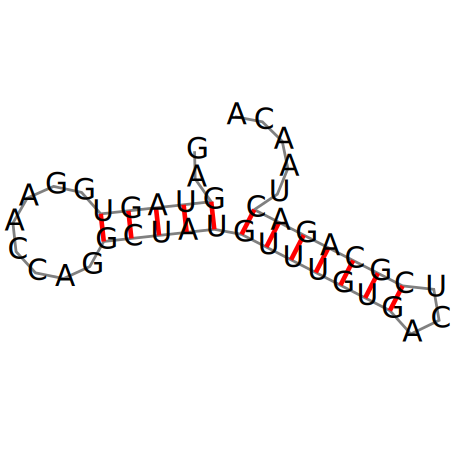

In [76]:
import tempfile
from IPython.display import SVG

fp = tempfile.NamedTemporaryFile(suffix="svg")
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

#### Predicting partition funtions and  base pair probabilities

In [77]:
## Code adapted from the Vienna RNA package API documentation

import RNA
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"
# create model details
md = RNA.md()
# activate unique multibranch loop decomposition
md.uniq_ML = 1
# create fold compound object
fc = RNA.fold_compound(sequence, md)
# compute MFE
(ss, mfe) = fc.mfe()
# rescale Boltzmann factors according to MFE; rescaling avoids numerical problems for long sequences
fc.exp_params_rescale(mfe)
# compute partition function to fill DP matrices
fc.pf()

['..(((((........)))))(((((((...))))))).....', -9.020990371704102]

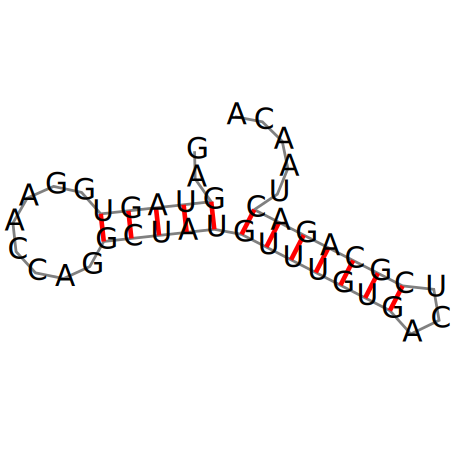

In [81]:
fp = tempfile.NamedTemporaryFile(suffix="svg")
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

After calculating the partition function, one can get a matrix of base pair probabilities from the fold compound. Attention: this matrix is 1-based and only entries i<j are meaningful.

In [79]:
bpp = fc.bpp()
print(bpp)

((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.471517529842516e-06, 0.0, 0.0, 0.0, 0.0, 6.791430803472922e-06, 0.0010463644992186186, 0.0, 0.0, 0.0, 7.447410311850145e-05, 2.92913569414249e-05, 0.0, 0.0005026182125581969, 0.0, 3.417231000231424e-05, 1.848688945200157e-05, 5.428577622559219e-06, 0.0, 2.060338991945053e-08, 0.0, 0.0, 3.3297354773749255e-08, 1.2277730722081867e-08, 0.007621723242911448, 0.0, 2.7482845615862142e-05, 0.0, 0.0, 0.0, 3.630494075522003e-05, 8.06813645180743e-05, 0.0, 0.0, 0.0024215220879167947, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4132247404604086e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02522054561995579, 0.0, 0.003759500839455213, 0.0, 2.829946707802918e-05, 7.251982919229705e-06, 1.0551914003292455e-06, 0.0, 6.341868188769273e-08

The base pair probabilities can be visualized

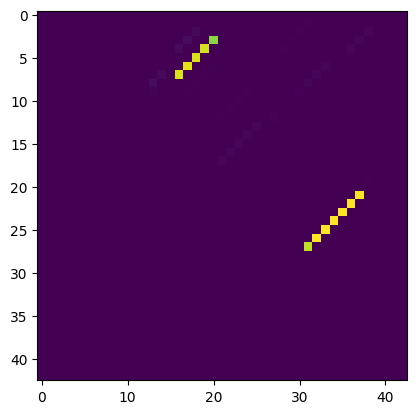

In [80]:
# produce simple 'dot plot'
import matplotlib.pyplot as plt
bpp2 = [p**2 for row in bpp[1:] for p in row[1:]]
plt.imshow(bpp)

We will also need unpaired probabilities for nucleotides i. They can be computed from the base pair probabilities. We obtain an unpaired probability profile of our RNA.

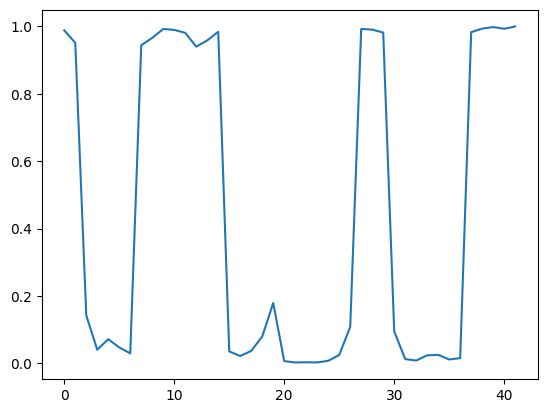

In [82]:
# compute unpaired probabilities (0-based)
# ATTENTION: bpp contains probability values only for i<j
unp = [1-sum(bpp[i][j]+bpp[j][i] for j in range(1,len(sequence)+1)) for i in range(1,len(sequence)+1)]
#print(unp)
plt.plot(unp)

#### Predicting structures from alignments

The Vienna package can predict structures from Alignments by the *Alifold* method. For this purpose, we pass an alignment (instead of a single sequence) to the fold compound. Then, we can ask it to produce an mfe structure (or partion function, ...) as in the single sequence case.

GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC
GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC
GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC
GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC
GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC
(((((((..((((........))))((((((.......))))))...............(((((.......)))))))))))) [ -25.34,   7.80 ]



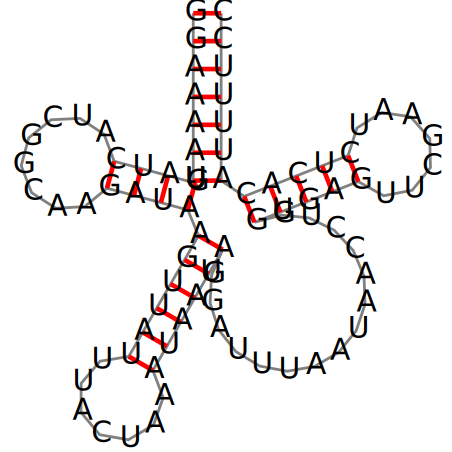

In [88]:
import RNA
# The RNA sequence

alignment = ["GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC",
"GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC",
"GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC",
"GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC",
"GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC"
]

# create a new model details structure
md = RNA.md()
# optionally one could change some parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default 2 for compatibility with partition folding
# create a fold compound
fc = RNA.fold_compound(alignment, md)
# predict the  "Alifold" Minmum Free Energy and the corresponding secondary structure
(ss, mfe) = fc.mfe()
conservation_score = fc.eval_covar_structure(ss)
print("%s\n%s [ %6.2f, %6.2f ]\n" % ('\n'.join(alignment), ss, mfe, conservation_score))

fp = tempfile.NamedTemporaryFile(suffix="svg")
RNA.svg_rna_plot(alignment[0], structure=ss, ssfile=fp.name)  
SVG(fp.name)

fp = tempfile.NamedTemporaryFile(suffix="svg")
RNA.svg_rna_plot(alignment[4], structure=ss, ssfile=fp.name)  
SVG(fp.name)

## Assignment 5: Use the Vienna RNA package

a) Write a function that takes an alignment (as above) and computes the mfe structures of the single sequences (without gaps).

b) Compare the single sequence mfe structures to the alifold mfe structure of the alignment (compare dot bracket strings and/or visualize as secondary structure plots).

c) Write a function that takes an alignment (as above) and computes the average positional unpaired probabilities from folding
the single sequences. Take care, where this requires to map sequence positions to alignment columns or vice versa.

d) Visually compare this profile to the Alifold mfe structure and the corresponding Alifold unpaired probability profile. 

e) Quantify the difference between the profiles (e.g. sum over the log of the positional ratios...).

## Test data

Find test data here
https://www.lix.polytechnique.fr/~will/Teaching/INF588/Testdata

Can your program handle all of the diverse examples (in different file formats)?

Here is one way to download the data to Colab by downloading an archive of all files and unpacking it. The files will be written to subdirectory Testdata

In [31]:
from urllib.request import urlretrieve
arcfile = "testdata.zip"
url = f"https://www.lix.polytechnique.fr/~will/Teaching/INF588/{arcfile}"
urlretrieve(url, arcfile)

import zipfile
with zipfile.ZipFile(arcfile, 'r') as zip_ref:
    zip_ref.extractall(".")

!ls Testdata

5S_rRNA.apsi-54.sci-95.no-1.ref.fa
Intron_gpII.apsi-54.sci-66.no-1.ref.fa
RF00100.stockholm.txt
RF00568.stockholm.txt
SRP_euk_arch.apsi-34.sci-67.no-1.ref.fa
SRP_euk_arch.apsi-68.sci-83.no-1.ref.fa
tRNA_15.stk
tRNA_5.aln
tRNA_7-clustalw.aln
tRNA_7.stk


## Assignment 6

a) Write a function to read an alignment from either an aln or stk file. Use Biopython (https://biopython.org/docs/1.75/api/Bio.AlignIO.html) and find out about stk / Stockholm files!

b) Apply the functions from the previous assignment to the test alignments. How could we interpret the results?

## How to work on the project
In principle, you could start your work using Colab and simply extend this notebook. However at least in the longer run, it will have advantages to run everything 'locally' on your own computer; without Colab.  Note that for example, running larger computations in Colab can be inconvenient; also, Colab will require you to reinstall Conda, Biopython and Vienna RNA in each new Colab session.

See above for how pip can be used to install the required software. This works in Colab as well as locally. *Optionally*: For local installation, one should consider installation in a Conda environment or Python virtual environment (which helps to keep things nicely structured, if one works on several projects with different software dendencies etc). 